### Purpose: Based on Socio-economic & Health factors find countries in direst need of developmental aid.

## Import libraries

In [1]:
#import all the necessary libraries

import pandas as pd
import numpy as np
import pandas as pd

# For Visualisation
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# To Scale our data
from sklearn.preprocessing import scale

# To perform KMeans clustering 
from sklearn.cluster import KMeans

# To perform Hierarchical clustering
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree

import warnings
warnings.filterwarnings("ignore")

In [2]:
data=pd.read_csv("Country-data.csv")

In [3]:
data.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
country       167 non-null object
child_mort    167 non-null float64
exports       167 non-null float64
health        167 non-null float64
imports       167 non-null float64
income        167 non-null int64
inflation     167 non-null float64
life_expec    167 non-null float64
total_fer     167 non-null float64
gdpp          167 non-null int64
dtypes: float64(7), int64(2), object(1)
memory usage: 13.1+ KB


In [5]:
data.shape

(167, 10)

In [6]:
data.isna().sum()

country       0
child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
dtype: int64

In [7]:
# There are no missing values in the dataset.

### Outlier treatment

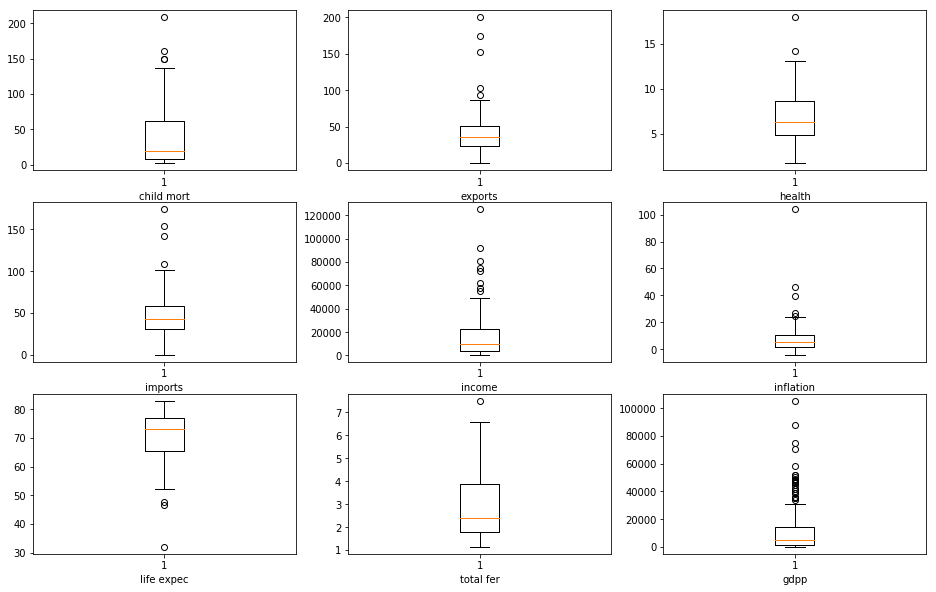

In [8]:
plt.figure(figsize=(16,10))

plt.subplot(3,3,1)
plt.boxplot(data.child_mort)
plt.xlabel("child mort")

plt.subplot(3,3,2)
plt.boxplot(data.exports)
plt.xlabel("exports")

plt.subplot(3,3,3)
plt.boxplot(data.health)
plt.xlabel("health")

plt.subplot(3,3,4)
plt.boxplot(data.imports)
plt.xlabel("imports")

plt.subplot(3,3,5)
plt.boxplot(data.income)
plt.xlabel("income")

plt.subplot(3,3,6)
plt.boxplot(data.inflation)
plt.xlabel("inflation")

plt.subplot(3,3,7)
plt.boxplot(data.life_expec)
plt.xlabel("life expec")

plt.subplot(3,3,8)
plt.boxplot(data.total_fer)
plt.xlabel("total fer")

plt.subplot(3,3,9)
plt.boxplot(data.gdpp)
plt.xlabel("gdpp")

plt.show()

In [9]:
# High child mortality is an indicator ofunder-deveopment of a country. Upon removing high end outliers, these undeveloped countries will be removed.
#So we need to list those countries separately after clustering with mean values of clusters.
#There are many outliers for high GDP values, indicative of highdevelopment, the outlier removal will remove these developed countries too.

In [10]:
num_data= data[['child_mort','exports','health','imports','income','inflation','life_expec','total_fer','gdpp']]
# Checking outliers at 25%,50%,75%,90%,95% and 99%
num_data.describe(percentiles=[.25,.5,.75,.90,.95,.99])

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
90%,100.220000,70.800000,10.940000,75.420000,41220.000000,16.640000,80.400000,5.322000,41840.000000
95%,116.000000,80.570000,11.570000,81.140000,48290.000000,20.870000,81.400000,5.861000,48610.000000
99%,153.400000,160.480000,13.474000,146.080000,84374.000000,41.478000,82.370000,6.563600,79088.000000


### Retaining data within +/-3 (StdDev) range

In [11]:
def remove_outlier(df, Data):
        df_out=df[np.abs(df[Data]-df[Data].mean()) <= (3*df[Data].std())]
        return df_out

In [12]:
df1=remove_outlier(data,'child_mort')

In [13]:
df1.shape

(165, 10)

In [14]:
df2=remove_outlier(df1,'exports')

In [15]:
df2.shape

(162, 10)

In [16]:
df3=remove_outlier(df2,'health')

In [17]:
df3.shape

(161, 10)

In [18]:
df4=remove_outlier(df3,'imports')

In [19]:
df4.shape

(160, 10)

In [20]:
df5=remove_outlier(df4,'income')

In [21]:
df5.shape

(157, 10)

In [22]:
df6=remove_outlier(df5,'inflation')

In [23]:
df6.shape

(155, 10)

In [24]:
df7=remove_outlier(df6,'life_expec')

In [25]:
df7.shape

(155, 10)

In [26]:
df8=remove_outlier(df7,'total_fer')

In [27]:
df8.shape

(155, 10)

In [28]:
df=remove_outlier(df8,'gdpp')

In [29]:
df.shape

(153, 10)

In [30]:
df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


### Visualising the Data distribution after Outlier removal

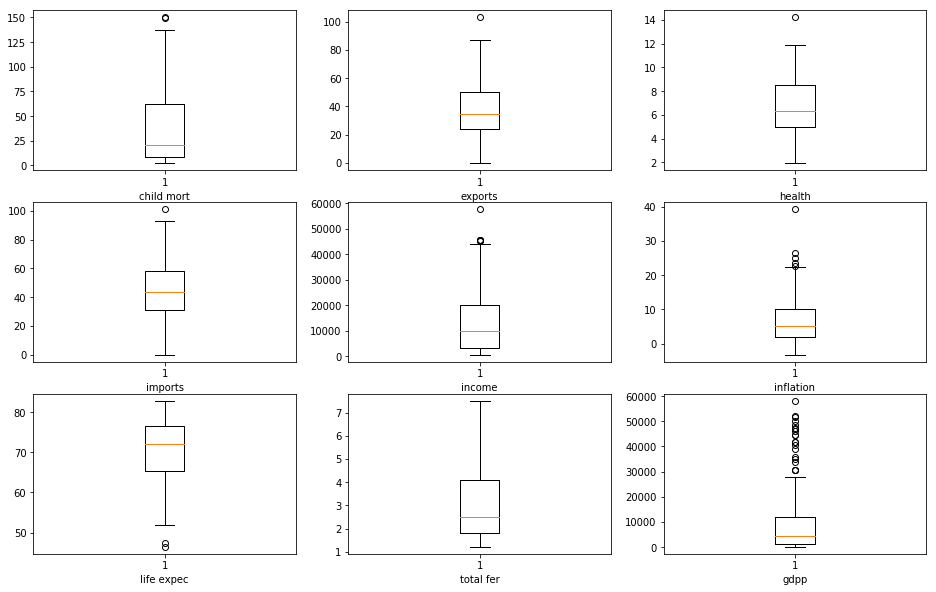

In [31]:
plt.figure(figsize=(16,10))

plt.subplot(3,3,1)
plt.boxplot(df.child_mort)
plt.xlabel("child mort")

plt.subplot(3,3,2)
plt.boxplot(df.exports)
plt.xlabel("exports")

plt.subplot(3,3,3)
plt.boxplot(df.health)
plt.xlabel("health")

plt.subplot(3,3,4)
plt.boxplot(df.imports)
plt.xlabel("imports")

plt.subplot(3,3,5)
plt.boxplot(df.income)
plt.xlabel("income")

plt.subplot(3,3,6)
plt.boxplot(df.inflation)
plt.xlabel("inflation")

plt.subplot(3,3,7)
plt.boxplot(df.life_expec)
plt.xlabel("life expec")

plt.subplot(3,3,8)
plt.boxplot(df.total_fer)
plt.xlabel("total fer")

plt.subplot(3,3,9)
plt.boxplot(df.gdpp)
plt.xlabel("gdpp")

plt.show()

In [32]:
# Checking outliers at 25%,50%,75%,90%,95% and 99%
num_cols= ['child_mort','exports','health','imports','income','inflation','life_expec','total_fer','gdpp']
df[num_cols].describe(percentiles=[.25,.5,.75,.90,.95,.99])

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,153.000000,153.000000,153.000000,153.000000,153.000000,153.000000,153.000000,153.000000,153.000000
mean,37.933987,38.202608,6.786209,45.350758,14237.209150,7.068333,70.362092,2.991111,10521.065359
std,36.964735,19.894894,2.528511,18.463141,13441.625893,6.898622,8.279382,1.520955,13969.934125
min,2.600000,0.109000,1.970000,0.065900,609.000000,-3.220000,46.500000,1.230000,231.000000
25%,8.700000,23.800000,4.980000,30.900000,3320.000000,1.850000,65.300000,1.800000,1310.000000
50%,20.700000,35.000000,6.320000,43.300000,9860.000000,5.140000,72.100000,2.520000,4500.000000
75%,62.200000,50.500000,8.500000,58.100000,20100.000000,10.100000,76.500000,4.080000,12100.000000
90%,96.640000,66.400000,10.660000,70.360000,36760.000000,16.580000,80.260000,5.334000,34740.000000
95%,112.200000,76.340000,11.340000,79.420000,42000.000000,20.740000,81.340000,5.982000,45180.000000
99%,142.760000,86.328000,11.900000,89.428000,45596.000000,25.668000,82.000000,6.569200,51996.000000


In [33]:
#This data can be used now as the values are now increasing gradually.

In [34]:
df_scaled=df[num_cols]

### Scaling with StandardScaler

In [35]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_scaled)

In [36]:
df_scaled.shape

(153, 9)

In [37]:
num_data=df[num_cols]

In [38]:
num_data.shape

(153, 9)

In [39]:
num_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 153 entries, 0 to 166
Data columns (total 9 columns):
child_mort    153 non-null float64
exports       153 non-null float64
health        153 non-null float64
imports       153 non-null float64
income        153 non-null int64
inflation     153 non-null float64
life_expec    153 non-null float64
total_fer     153 non-null float64
gdpp          153 non-null int64
dtypes: float64(7), int64(2)
memory usage: 12.0 KB


In [40]:
num_data.head(5)

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


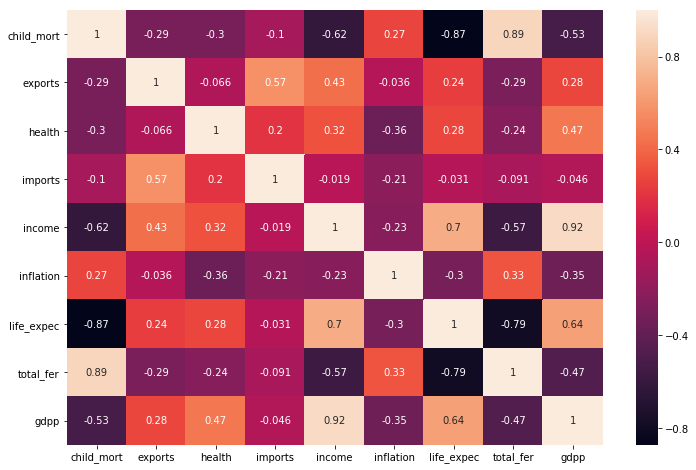

In [41]:
# Let's see the correlation matrix 
plt.figure(figsize = (12,8))        # Size of the figure
sns.heatmap(num_data.corr(),annot = True)
plt.show()

In [42]:
#Above heat map can be used to find correlation between different variables-
#1.Very strong positive correlation between child_mort & total_fer-->more children born, more probability of child death
#2.Strong negative correlation b/w child_mort & life_exepec--> child mortality high, life expectancy low, that is interpretable 
#3.Moderate negative correlation b/w child_mor & income;high child_mor-->low income; high child_mor-->high total_fer-->
#low life_expec-->low income
#so overall high child_mor and high total_fer is proving bad for economy
#4.Strong negative correlation b/w total_fer & life_expec -->chid_mor-->high-->life_expec low
#So out of (Child_mor, total_fer and life_expec), child_mor can be analysed to check development status of a country
#5.Moderate positive correlation b/w income & exports; high income-->high exports
#6.Moderate positive correlation b/w imports & exports; high exports-->high imports
#7.gdpp is negatively correlated with total_fer and child_mor. High child_mor, low life_epec will negatively affect the GDP of a country
#8. gdpp is positively correlated with income, exports, imports, health. That means out of these variables, 
#gdpp is a strong indicator of development status of a country

## Variables to decide development status.

In [43]:
#So, according to above correlation analysis and by definition of HDI (Human development index), the main variables to decide
#development status of a country-
#1. child_mor
#2.gdpp
#3.income
#4.life_expec

In [44]:
#Improting the PCA module
from sklearn.decomposition import PCA
pca = PCA(svd_solver='randomized', random_state=42)

In [45]:
pca.fit(df_scaled)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=42,
  svd_solver='randomized', tol=0.0, whiten=False)

In [46]:
pca.components_.shape

(9, 9)

In [47]:
len(pca.components_[:])

9

### Factor loadings

In [48]:
colnames = list(num_data.columns)
pcs_df = pd.DataFrame({'Feature':colnames,'PC1':pca.components_[0],'PC2':pca.components_[1]})
pcs_df

,Feature,PC1,PC2
0,child_mort,-0.423159,0.044443
1,exports,0.204297,0.626164
2,health,0.225493,-0.059947
3,imports,0.074955,0.742978
4,income,0.414756,-0.066375
5,inflation,-0.217286,-0.044619
6,life_expec,0.427509,-0.152393
7,total_fer,-0.404501,0.031184
8,gdpp,0.396375,-0.140503


## Loading plot

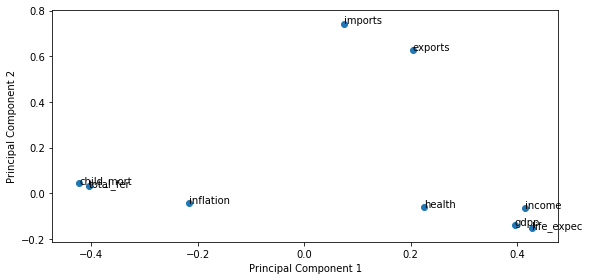

In [49]:
%matplotlib inline
fig = plt.figure(figsize = (8,4))
plt.scatter(pcs_df.PC1, pcs_df.PC2)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
for i, txt in enumerate(pcs_df.Feature):
    plt.annotate(txt, (pcs_df.PC1[i],pcs_df.PC2[i]))
plt.tight_layout()
plt.show()

In [50]:
#Above loading plot shows the variation explained by principal components PC1 & PC2 for each variable.
#for eg. PC1 explains high amount of variation for life_expec, gdpp, income and lower for inflation.
#PC2 explains higher amount of variability for imports & health.
#Rest of the original variables are explained by both PC1 and PC2.

#### Looking at the screeplot to assess the number of needed principal components

In [51]:
pca.explained_variance_ratio_

array([0.47658219, 0.16528782, 0.13399748, 0.10107577, 0.06996619,
       0.02131381, 0.01778203, 0.00855332, 0.0054414 ])

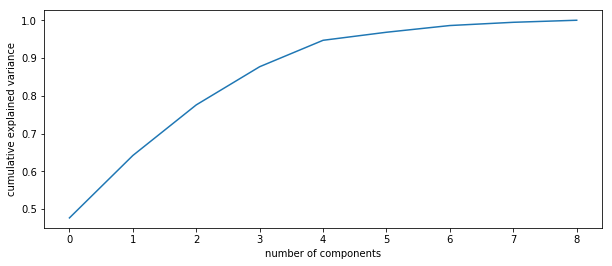

In [52]:
#Making the screeplot - plotting the cumulative variance against the number of components
%matplotlib inline
fig = plt.figure(figsize = (10,4))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()

In [53]:
# 4 components explain ~95% variation in the dataset.

### Selecting only two Principal components by using svd_solver in PCA

In [54]:
#Improting the PCA module
from sklearn.decomposition import PCA
pca_final = PCA(svd_solver='randomized', random_state=42,n_components=4)

In [55]:
#Using incremental PCA for efficiency - saves a lot of time on larger datasets
#from sklearn.decomposition import IncrementalPCA
#pca_final = IncrementalPCA(n_components=4)

In [56]:
df_pca = pca_final.fit_transform(df_scaled)
df_pca.shape

(153, 4)

In [57]:
df_pca

array([[-3.05975332, -0.39711716,  1.32279092,  0.64015784],
       [ 0.5625343 , -0.24537869, -0.03080394, -1.37725747],
       [-0.3211212 , -0.61385283, -1.81444197, -0.24177954],
       [-3.36372992,  1.12044313, -1.70435018,  2.08683105],
       [ 1.31956343,  0.62100026, -0.06278582, -0.70473426],
       [ 0.2104961 , -2.0768526 , -1.21253583,  0.20121016],
       [-0.12917551, -0.49329537, -0.69566185, -1.48647259],
       [ 3.35683373, -2.40496743,  0.49555779,  1.36775857],
       [ 3.97527087, -0.31783038,  0.8836598 ,  1.47454889],
       [-0.10117065, -0.46775009, -1.47029452,  0.2014861 ],
       [ 1.81766106, -0.480768  ,  0.66272819,  0.03909557],
       [ 2.14290117,  0.86071809, -1.42215517,  0.90238009],
       [-1.2156256 , -1.41819526, -0.78207449, -1.154333  ],
       [ 1.459093  , -0.03931956,  0.53908679, -0.69337245],
       [ 0.56284625,  1.13060274, -1.30917365, -0.54676099],
       [ 4.00832207,  1.615139  ,  0.73346732,  1.6028788 ],
       [ 0.27670116,  1.

In [58]:
df_pca.shape

(153, 4)

In [59]:
#Creating a transpose so that the each column is properly arranged
pc = np.transpose(df_pca)

In [60]:
pcs_df2 = pd.DataFrame({'PC1':pc[0],'PC2':pc[1],'PC3':pc[2],'PC4':pc[3]})

In [61]:
pcs_df2.head()

,PC1,PC2,PC3,PC4
0,-3.059753,-0.397117,1.322791,0.640158
1,0.562534,-0.245379,-0.030804,-1.377257
2,-0.321121,-0.613853,-1.814442,-0.241780
3,-3.363730,1.120443,-1.704350,2.086831
4,1.319563,0.621000,-0.062786,-0.704734


In [62]:
pcs_df2.shape

(153, 4)

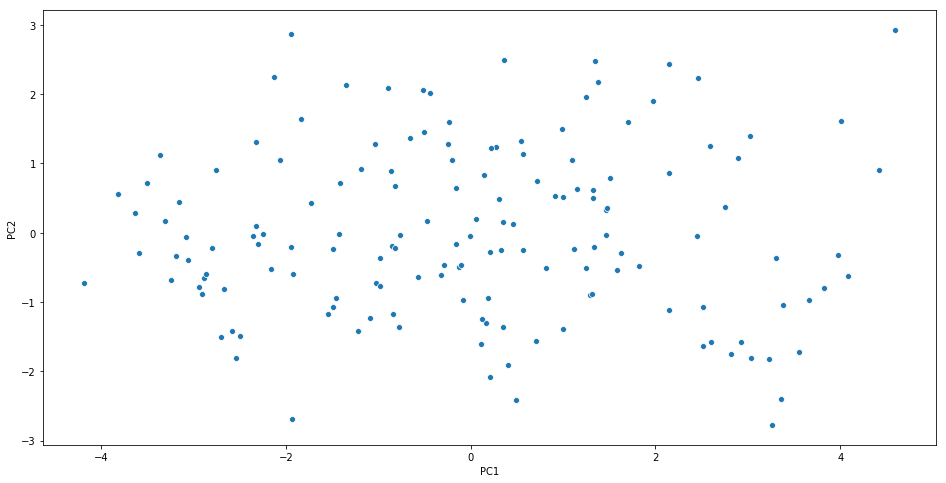

In [63]:
#Visualising the points on the PCs.
# one of the prime advatanges of PCA is that you can visualise high dimensional data
plt.figure(figsize=(16,8))
sns.scatterplot(x='PC1',y='PC2',data=pcs_df2)
plt.show()

#### Creating correlation matrix for the principal components - we expect little to no correlation

In [64]:
#creating correlation matrix for the principal components
corrmat = np.corrcoef(df_pca.transpose())

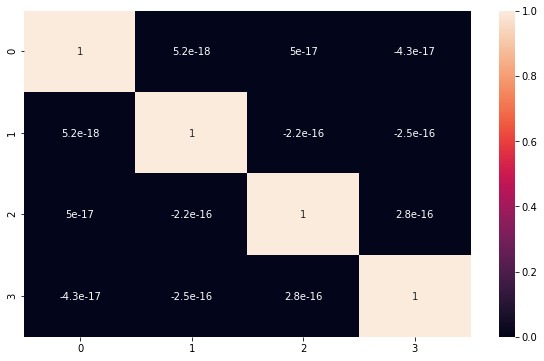

In [65]:
#plotting the correlation matrix
%matplotlib inline
plt.figure(figsize = (10,6))
sns.heatmap(corrmat,annot = True)
plt.show()

In [66]:
# 1s -> 0s in diagonals
corrmat_nodiag = corrmat - np.diagflat(corrmat.diagonal())
print("max corr:",corrmat_nodiag.max(), ", min corr: ", corrmat_nodiag.min(),)

max corr: 2.822445563531049e-16 , min corr:  -2.53939476563634e-16


In [67]:
# we see that correlations for df_pca dataframe are indeed very close to 0 so the PCs are truly independent components.

## Clustering 

### Checking Clustring tendency of PCA modified dataset with Hopkins statistics

In [68]:
from sklearn.neighbors import NearestNeighbors
from random import sample
from numpy.random import uniform
import numpy as np
from math import isnan
 
def hopkins(X):
    d = X.shape[1]
    #d = len(vars) # columns
    n = len(X) # rows
    m = int(0.1 * n) 
    nbrs = NearestNeighbors(n_neighbors=1).fit(X.values)
 
    rand_X = sample(range(0, n, 1), m)
 
    ujd = []
    wjd = []
    for j in range(0, m):
        u_dist, _ = nbrs.kneighbors(uniform(np.amin(X,axis=0),np.amax(X,axis=0),d).reshape(1, -1), 2, return_distance=True)
        ujd.append(u_dist[0][1])
        w_dist, _ = nbrs.kneighbors(X.iloc[rand_X[j]].values.reshape(1, -1), 2, return_distance=True)
        wjd.append(w_dist[0][1])
 
    H = sum(ujd) / (sum(ujd) + sum(wjd))
    if isnan(H):
        print(ujd, wjd)
        H = 0
 
    return H

In [69]:
data_pca=pcs_df2

In [70]:
hopkins(pcs_df2)

0.7055252976519507

In [71]:
# That's a moderate number, indicating the clustering tendency of dataset.

### Plotting Elbow curve to find optimal no. of clusters.

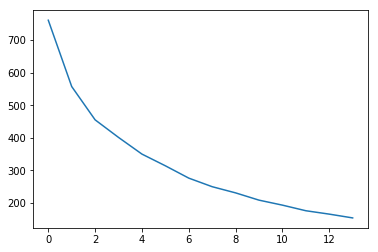

In [72]:
# sum of squared distances
ssd = []
for num_clusters in list(range(2,16)):
    model_clus = KMeans(n_clusters = num_clusters, max_iter=100)
    model_clus.fit(data_pca)
    ssd.append(model_clus.inertia_)

plt.plot(ssd)
plt.show()

In [73]:
# The elbow is in the range of k=3 to 5. So optimum number of clusters maybe  3/4/5.

### Silhoutte analysis to find optimal no. of clusters.

In [74]:
from sklearn.metrics import silhouette_score
sse_ = []
for k in range(2, 16):
    kmeans = KMeans(n_clusters=k).fit(data_pca)
    sse_.append([k, silhouette_score(data_pca, kmeans.labels_)])

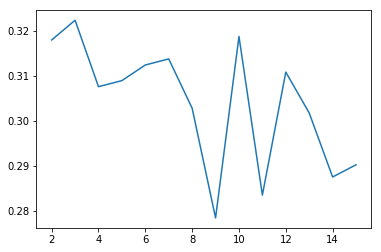

In [75]:
plt.plot(pd.DataFrame(sse_)[0], pd.DataFrame(sse_)[1]);

In [76]:
#The elbow ucrve indicates n=3 to 5 to be optimum no. of clusters.
#At n=3 Silhouette score is maximum at 0.33 however, sse at n=4 and n=5 ~0.31 i.e. not a large difference.
#Combining the results so elbow curve and Silhouette scores, testing clusters for k=4 and k=5.

In [77]:
#K means has been performed with k=4 also, and the results have been compared with K=5 in ppt.
#However in the notebook K=5 is shown because it is giving better classification.

## K means with K=4

In [78]:
# Kmeans with K=4
model_clus4 = KMeans(n_clusters = 4, max_iter=50,random_state = 50)
model_clus4.fit(data_pca)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=50,
    n_clusters=4, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=50, tol=0.0001, verbose=0)

In [79]:
data_pca.index = pd.RangeIndex(len(data_pca.index))
data_pc_km4 = pd.concat([data_pca, pd.Series(model_clus4.labels_)], axis=1)
data_pc_km4.columns = ['PC1', 'PC2','PC3','PC4','clusterid']
data_pc_km4.head(10)

,PC1,PC2,PC3,PC4,clusterid
0,-3.059753,-0.397117,1.322791,0.640158,1
1,0.562534,-0.245379,-0.030804,-1.377257,2
2,-0.321121,-0.613853,-1.814442,-0.241780,0
3,-3.363730,1.120443,-1.704350,2.086831,1
4,1.319563,0.621000,-0.062786,-0.704734,2
5,0.210496,-2.076853,-1.212536,0.201210,0
6,-0.129176,-0.493295,-0.695662,-1.486473,0
7,3.356834,-2.404967,0.495558,1.367759,3
8,3.975271,-0.317830,0.883660,1.474549,3
9,-0.101171,-0.467750,-1.470295,0.201486,0


In [80]:
data_pc_km4.shape

(153, 5)

In [81]:
data_pc_km4.groupby(['clusterid']).clusterid.count()

clusterid
0    35
1    43
2    49
3    26
Name: clusterid, dtype: int64

In [82]:
data_pc_km4.head()

,PC1,PC2,PC3,PC4,clusterid
0,-3.059753,-0.397117,1.322791,0.640158,1
1,0.562534,-0.245379,-0.030804,-1.377257,2
2,-0.321121,-0.613853,-1.814442,-0.241780,0
3,-3.363730,1.120443,-1.704350,2.086831,1
4,1.319563,0.621000,-0.062786,-0.704734,2


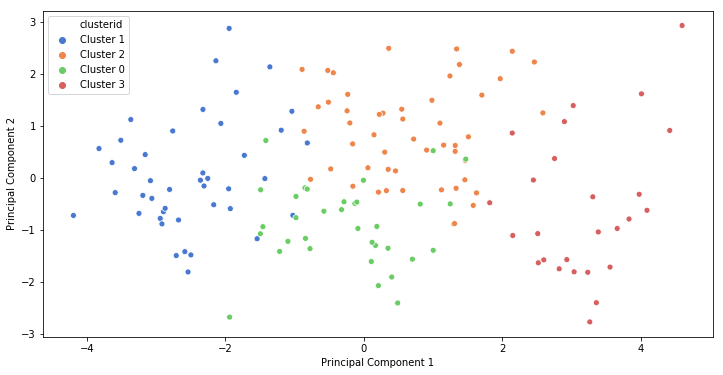

In [83]:
%matplotlib inline
fig = plt.figure(figsize = (12,6))
sns.scatterplot(data_pc_km4['PC1'], data_pc_km4['PC2'],hue= data_pc_km4['clusterid'].map({0:'Cluster 0',1:'Cluster 1',2:'Cluster 2',3:'Cluster 3'}),palette='muted',legend='full')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
#plt.legend()
plt.show()

In [84]:
# analysis of clusters formed
df.index = pd.RangeIndex(len(df.index))
data_km4 = pd.concat([df, pd.Series(model_clus4.labels_)], axis=1)
data_km4.columns =  ['country','child_mort','exports','health','imports','income','inflation','life_expec','total_fer','gdpp','clusterid']

In [85]:
data_km4.shape

(153, 11)

In [86]:
data_km4.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,clusterid
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,1
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,2
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,0
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,1
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,2


### Visualising behaviour of different variables for different countries for K=4 - To understand Cluster characteristic

In [87]:
# analysis of clusters formed
km_clusters_child_mort4 = 	pd.DataFrame(data_km4.groupby(["clusterid"]).child_mort.mean())
km_clusters_exports4 = 	pd.DataFrame(data_km4.groupby(["clusterid"]).exports.mean())
km_clusters_health4 = 	pd.DataFrame(data_km4.groupby(["clusterid"]).health.mean())
km_clusters_imports4 = 	pd.DataFrame(data_km4.groupby(["clusterid"]).imports.mean())
km_clusters_income4 = 	pd.DataFrame(data_km4.groupby(["clusterid"]).income.mean())
km_clusters_inflation4 = 	pd.DataFrame(data_km4.groupby(["clusterid"]).inflation.mean())
km_clusters_life_expec4 = 	pd.DataFrame(data_km4.groupby(["clusterid"]).life_expec.mean())
km_clusters_total_fer4 = 	pd.DataFrame(data_km4.groupby(["clusterid"]).total_fer.mean())
km_clusters_gdpp4 = 	pd.DataFrame(data_km4.groupby(["clusterid"]).gdpp.mean())

### Creating a dataframe 'df_cl' to distinguish variation among clusters

In [88]:
df_cl4= pd.concat([pd.Series([0,1,2,3]), km_clusters_child_mort4, km_clusters_exports4, km_clusters_health4,km_clusters_imports4,km_clusters_income4,km_clusters_inflation4,km_clusters_life_expec4,km_clusters_total_fer4,km_clusters_gdpp4], axis=1)
df_cl4.columns =  ['clusterid','child_mort','exports','health','imports','income','inflation','life_expec','total_fer','gdpp']

**Mean values of variables across clusters.**

In [89]:
df_cl4=round(df_cl4,2)
df_cl4

,clusterid,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,0,27.60,30.90,5.33,29.11,13657.71,12.02,72.40,2.49,6365.66
1,1,88.91,28.62,6.26,43.68,3521.70,9.71,59.85,5.02,1731.37
2,2,18.15,48.29,6.96,59.89,11741.63,4.00,72.92,2.21,6503.59
3,3,4.83,44.88,9.30,42.57,37442.31,1.81,80.17,1.78,38223.08


**Number of countries in clusters.**

In [90]:
data_km4.groupby('clusterid').clusterid.count()

clusterid
0    35
1    43
2    49
3    26
Name: clusterid, dtype: int64

## K means with K=5

In [91]:
# Kmeans with K=5
model_clus = KMeans(n_clusters = 5, max_iter=50,random_state = 50)
model_clus.fit(data_pca)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=50,
    n_clusters=5, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=50, tol=0.0001, verbose=0)

In [92]:
#data is original raw dataset
data.head(2)

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090


In [93]:
data.shape

(167, 10)

In [94]:
#df is outlier removed dataset
df.head(2)

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090


In [95]:
df.shape

(153, 10)

In [96]:
data_pca.index = pd.RangeIndex(len(data_pca.index))
data_pc_km = pd.concat([data_pca, pd.Series(model_clus.labels_)], axis=1)
data_pc_km.columns = ['PC1', 'PC2','PC3','PC4','clusterid']
data_pc_km.head(10)

,PC1,PC2,PC3,PC4,clusterid
0,-3.059753,-0.397117,1.322791,0.640158,0
1,0.562534,-0.245379,-0.030804,-1.377257,3
2,-0.321121,-0.613853,-1.814442,-0.241780,2
3,-3.363730,1.120443,-1.704350,2.086831,0
4,1.319563,0.621000,-0.062786,-0.704734,3
5,0.210496,-2.076853,-1.212536,0.201210,2
6,-0.129176,-0.493295,-0.695662,-1.486473,2
7,3.356834,-2.404967,0.495558,1.367759,4
8,3.975271,-0.317830,0.883660,1.474549,4
9,-0.101171,-0.467750,-1.470295,0.201486,2


In [97]:
data_pc_km.shape

(153, 5)

In [98]:
data_pc_km.groupby(['clusterid']).clusterid.count()

clusterid
0    39
1    16
2    33
3    46
4    19
Name: clusterid, dtype: int64

In [99]:
data_pc_km.head()

,PC1,PC2,PC3,PC4,clusterid
0,-3.059753,-0.397117,1.322791,0.640158,0
1,0.562534,-0.245379,-0.030804,-1.377257,3
2,-0.321121,-0.613853,-1.814442,-0.241780,2
3,-3.363730,1.120443,-1.704350,2.086831,0
4,1.319563,0.621000,-0.062786,-0.704734,3


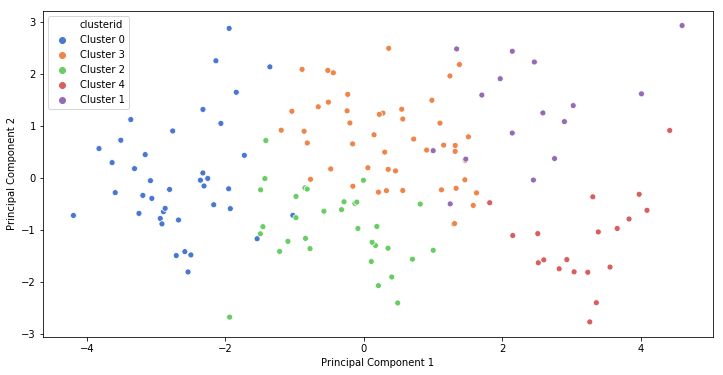

In [100]:
%matplotlib inline
fig = plt.figure(figsize = (12,6))
sns.scatterplot(data_pc_km['PC1'], data_pc_km['PC2'],hue= data_pc_km['clusterid'].map({0:'Cluster 0',1:'Cluster 1',2:'Cluster 2',3:'Cluster 3',4:'Cluster 4'}),palette='muted',legend='full')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
#plt.legend()
plt.show()

In [101]:
# analysis of clusters formed
df.index = pd.RangeIndex(len(df.index))
data_km = pd.concat([df, pd.Series(model_clus.labels_)], axis=1)
data_km.columns =  ['country','child_mort','exports','health','imports','income','inflation','life_expec','total_fer','gdpp','clusterid']

In [102]:
data_km.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,clusterid
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,0
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,3
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,2
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,0
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,3


In [103]:
data_km.shape

(153, 11)

### Visualising behaviour of different variables for different countries for K=5 - To understand Cluster characteristic

In [104]:
# analysis of clusters formed
km_clusters_child_mort = 	pd.DataFrame(data_km.groupby(["clusterid"]).child_mort.mean())
km_clusters_exports = 	pd.DataFrame(data_km.groupby(["clusterid"]).exports.mean())
km_clusters_health = 	pd.DataFrame(data_km.groupby(["clusterid"]).health.mean())
km_clusters_imports = 	pd.DataFrame(data_km.groupby(["clusterid"]).imports.mean())
km_clusters_income = 	pd.DataFrame(data_km.groupby(["clusterid"]).income.mean())
km_clusters_inflation = 	pd.DataFrame(data_km.groupby(["clusterid"]).inflation.mean())
km_clusters_life_expec = 	pd.DataFrame(data_km.groupby(["clusterid"]).life_expec.mean())
km_clusters_total_fer = 	pd.DataFrame(data_km.groupby(["clusterid"]).total_fer.mean())
km_clusters_gdpp = 	pd.DataFrame(data_km.groupby(["clusterid"]).gdpp.mean())

### Creating a dataframe 'df_cl' to distinguish variation among clusters

In [105]:
df_cl= pd.concat([pd.Series([0,1,2,3,4]), km_clusters_child_mort, km_clusters_exports, km_clusters_health,km_clusters_imports,km_clusters_income,km_clusters_inflation,km_clusters_life_expec,km_clusters_total_fer,km_clusters_gdpp], axis=1)
df_cl.columns =  ['clusterid','child_mort','exports','health','imports','income','inflation','life_expec','total_fer','gdpp']

**Mean values of variables across clusters.**

In [106]:
df_cl=round(df_cl,2)
df_cl

,clusterid,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,0,92.29,28.48,6.07,41.74,3226.49,10.03,59.68,5.18,1555.92
1,1,7.23,70.18,6.45,61.42,33718.75,5.16,76.93,1.87,22560.62
2,2,29.52,27.74,5.50,29.13,10903.94,11.70,72.01,2.50,5237.45
3,3,22.30,43.90,7.08,58.75,9959.35,4.29,71.70,2.37,5359.48
4,4,4.68,35.59,10.05,34.98,36578.95,1.27,80.63,1.80,40457.89


**Number of countries in clusters.**

In [107]:
data_km.groupby('clusterid').clusterid.count()

clusterid
0    39
1    16
2    33
3    46
4    19
Name: clusterid, dtype: int64

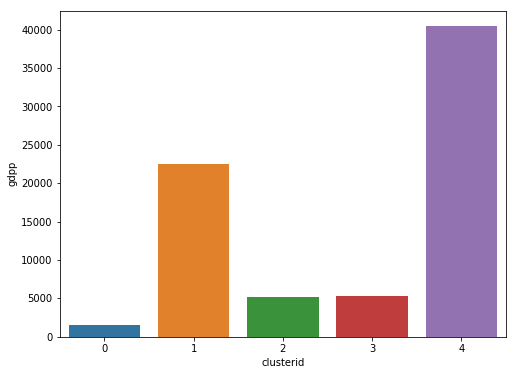

In [108]:
plt.figure(figsize=(8,6))
sns.barplot(x=df_cl.clusterid, y=df_cl.gdpp)
plt.show()

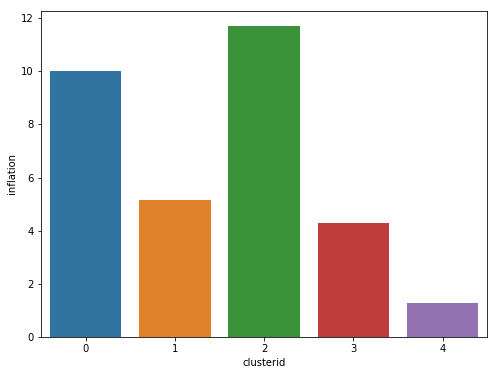

In [109]:
plt.figure(figsize=(8,6))
sns.barplot(x=df_cl.clusterid, y=df_cl.inflation)
plt.show()

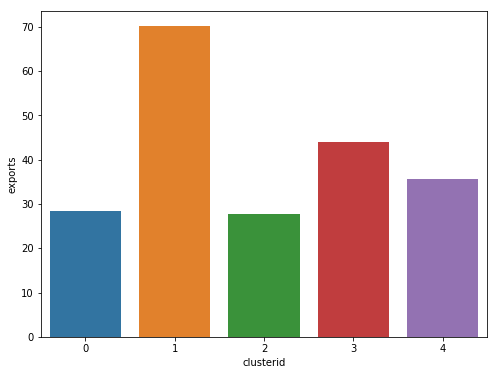

In [110]:
plt.figure(figsize=(8,6))
sns.barplot(x=df_cl.clusterid, y=df_cl.exports)
plt.show()

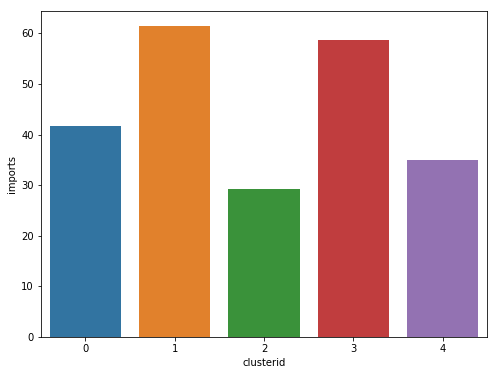

In [111]:
plt.figure(figsize=(8,6))
sns.barplot(x=df_cl.clusterid, y=df_cl.imports)
plt.show()

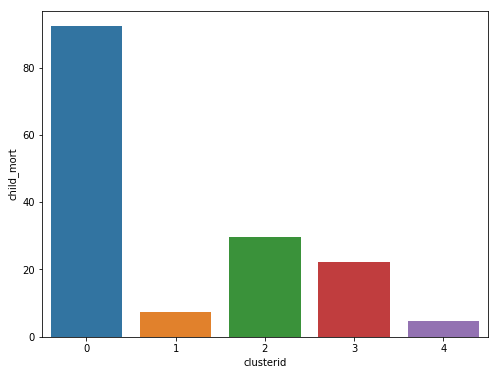

In [112]:
plt.figure(figsize=(8,6))
sns.barplot(x=df_cl.clusterid, y=df_cl.child_mort)
plt.show()

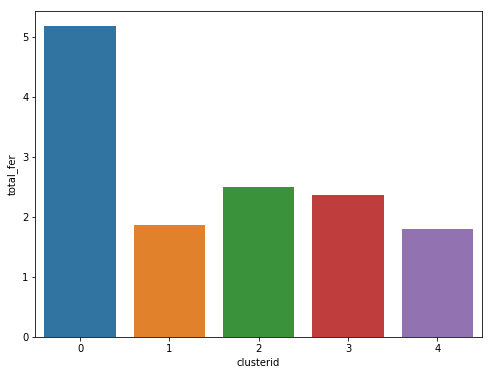

In [113]:
plt.figure(figsize=(8,6))
sns.barplot(x=df_cl.clusterid, y=df_cl.total_fer)
plt.show()

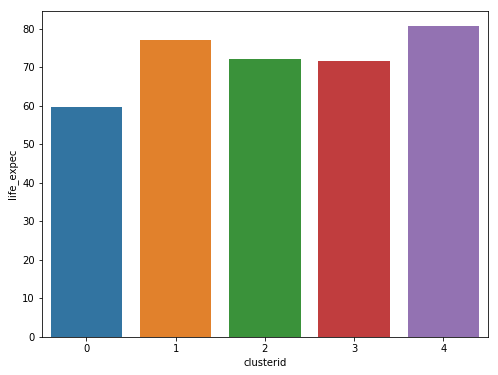

In [114]:
plt.figure(figsize=(8,6))
sns.barplot(x=df_cl.clusterid, y=df_cl.life_expec)
plt.show()

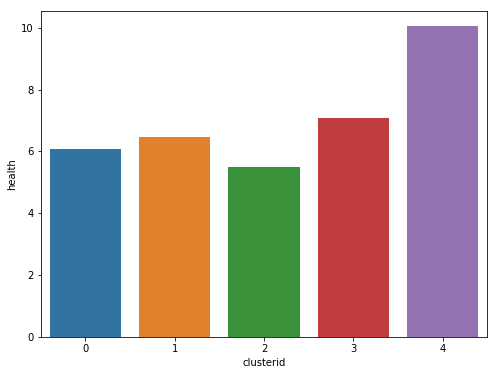

In [115]:
plt.figure(figsize=(8,6))
sns.barplot(x=df_cl.clusterid, y=df_cl.health)
plt.show()

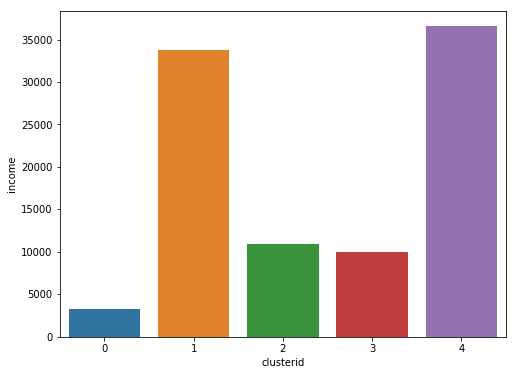

In [116]:
plt.figure(figsize=(8,6))
sns.barplot(x=df_cl.clusterid, y=df_cl.income)
plt.show()

In [117]:
#From the above plots, it can be inferred that-
#Countries in CLuster 0, have very low GDP, very high child mortality rate, high inflation(indicative of bad economic conditions),
#very low life expectancy, low health and income standards; So Cluster 0 signifies Under-developed countries.

#Countries in Cluster 4 on the other hand represent very good economic conditions with Very high GDP, very high income levels, low child_mortality
#and high life expectancy, good health conditions. So Clster 4 signifies developed conditions.

#Countries in Cluster 1 also represent good economic conditions though in slight moderate numbers than Cluster 4 and hence signify 
#developed countries (but lower than Cl 4)

#Countries in Cluster 2 & 3 are not very developed based on above parameters and represent low development economic conditions only.

#Thus the order of development may be written as-

#Bad--> Good
# 0-2-3-1-4

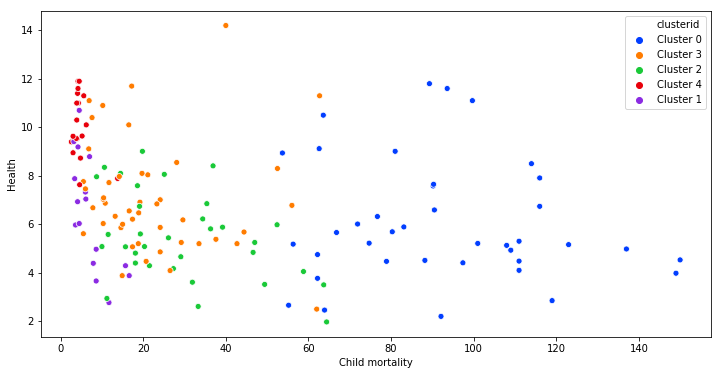

In [118]:
%matplotlib inline
fig = plt.figure(figsize = (12,6))
sns.scatterplot(data_km['child_mort'], data_km['health'],hue= data_km['clusterid'].map({0:'Cluster 0',1:'Cluster 1',2:'Cluster 2',3:'Cluster 3',4:'Cluster 4'}),palette='bright',legend='full')
plt.xlabel('Child mortality')
plt.ylabel('Health')
plt.show()

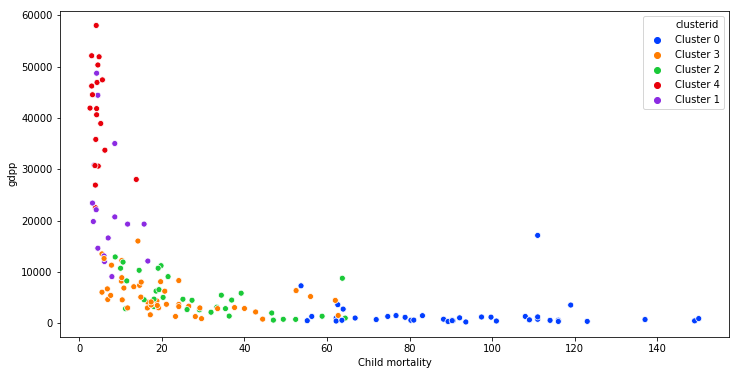

In [119]:
%matplotlib inline
fig = plt.figure(figsize = (12,6))
sns.scatterplot(data_km['child_mort'], data_km['gdpp'],hue= data_km['clusterid'].map({0:'Cluster 0',1:'Cluster 1',2:'Cluster 2',3:'Cluster 3',4:'Cluster 4'}),palette='bright',legend='full')
plt.xlabel('Child mortality')
plt.ylabel('gdpp')
plt.show()

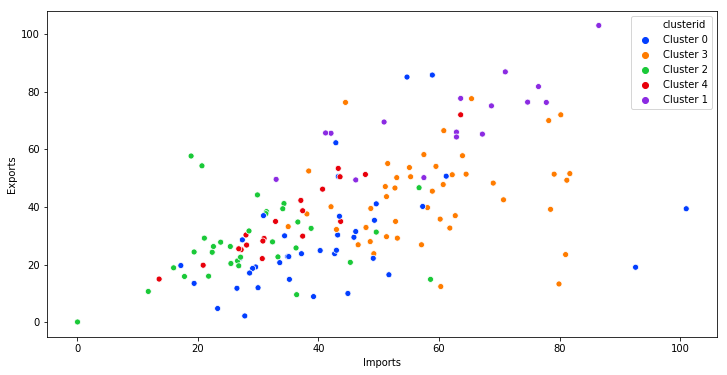

In [120]:
%matplotlib inline
fig = plt.figure(figsize = (12,6))
sns.scatterplot(data_km['imports'], data_km['exports'],hue= data_km['clusterid'].map({0:'Cluster 0',1:'Cluster 1',2:'Cluster 2',3:'Cluster 3',4:'Cluster 4'}),palette='bright',legend='full')
plt.xlabel('Imports')
plt.ylabel('Exports')
plt.show()

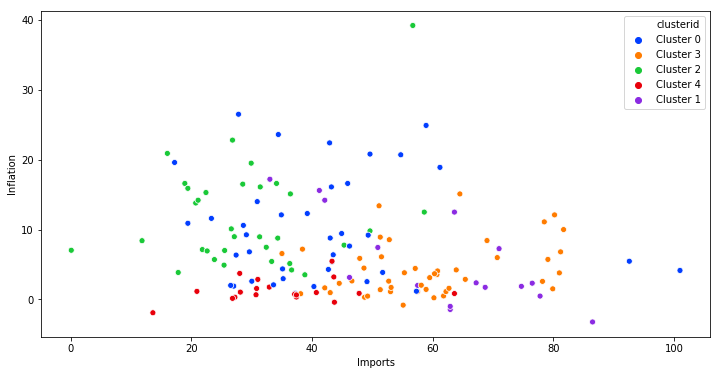

In [121]:
%matplotlib inline
fig = plt.figure(figsize = (12,6))
sns.scatterplot(data_km['imports'], data_km['inflation'],hue= data_km['clusterid'].map({0:'Cluster 0',1:'Cluster 1',2:'Cluster 2',3:'Cluster 3',4:'Cluster 4'}),palette='bright',legend='full')
plt.xlabel('Imports')
plt.ylabel('Inflation')
plt.show()

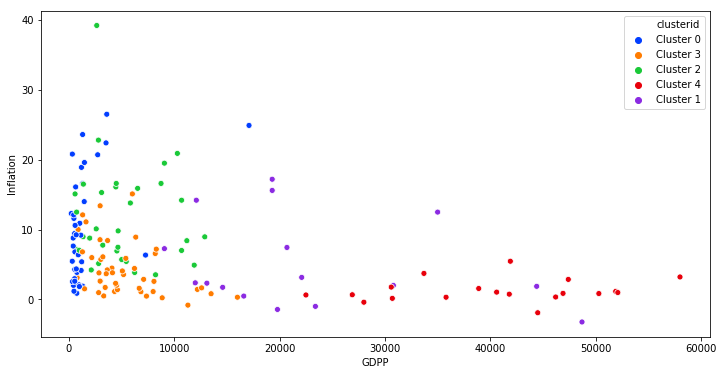

In [122]:
%matplotlib inline
fig = plt.figure(figsize = (12,6))
sns.scatterplot(data_km['gdpp'], data_km['inflation'],hue= data_km['clusterid'].map({0:'Cluster 0',1:'Cluster 1',2:'Cluster 2',3:'Cluster 3',4:'Cluster 4'}),palette='bright',legend='full')
plt.xlabel('GDPP')
plt.ylabel('Inflation')
plt.show()

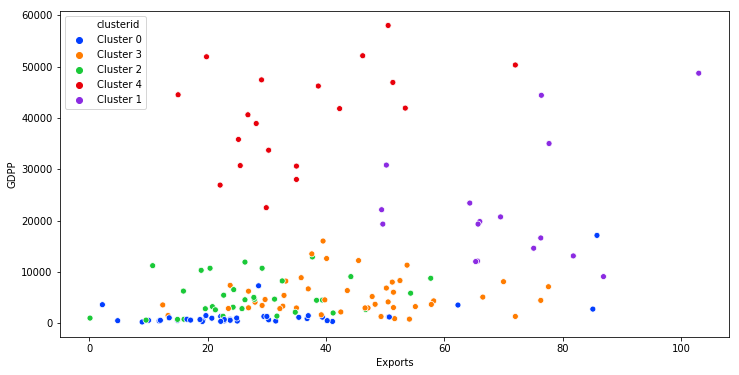

In [123]:
%matplotlib inline
fig = plt.figure(figsize = (12,6))
sns.scatterplot(data_km['exports'], data_km['gdpp'],hue= data_km['clusterid'].map({0:'Cluster 0',1:'Cluster 1',2:'Cluster 2',3:'Cluster 3',4:'Cluster 4'}),palette='bright',legend='full')
plt.xlabel('Exports')
plt.ylabel('GDPP')
plt.show()

## Hierarchical Clustering

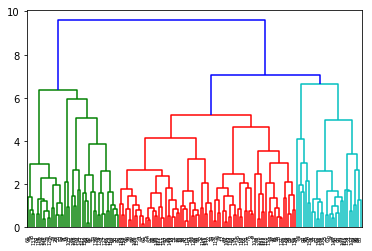

In [124]:
mergings = linkage(data_pca, method = "complete", metric='euclidean')
dendrogram(mergings)
plt.show()

In [125]:
clusterCut1 = pd.Series(cut_tree(mergings, n_clusters = 4).reshape(-1,))
data_hr1 = pd.concat([df, clusterCut1], axis=1)
data_hr1.columns =  ['country','child_mort','exports','health','imports','income','inflation','life_expec','total_fer','gdpp','clusterid']

In [126]:
data_hr1.shape

(153, 11)

In [127]:
data_hr1.head(2)

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,clusterid
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,0
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,1


**Number of contries in clusters.**

In [128]:
data_hr1.groupby('clusterid').clusterid.count()

clusterid
0    23
1    81
2     7
3    42
Name: clusterid, dtype: int64

### Sumamrising Hierarchial clustering results

In [129]:
# analysis of clusters formed
hr_clusters_child_mort1 = 	pd.DataFrame(data_hr1.groupby(["clusterid"]).child_mort.mean())
hr_clusters_exports1 = 	pd.DataFrame(data_hr1.groupby(["clusterid"]).exports.mean())
hr_clusters_health1 = 	pd.DataFrame(data_hr1.groupby(["clusterid"]).health.mean())
hr_clusters_imports1 = 	pd.DataFrame(data_hr1.groupby(["clusterid"]).imports.mean())
hr_clusters_income1 = 	pd.DataFrame(data_hr1.groupby(["clusterid"]).income.mean())
hr_clusters_inflation1 = 	pd.DataFrame(data_hr1.groupby(["clusterid"]).inflation.mean())
hr_clusters_life_expec1 = 	pd.DataFrame(data_hr1.groupby(["clusterid"]).life_expec.mean())
hr_clusters_total_fer1 = 	pd.DataFrame(data_hr1.groupby(["clusterid"]).total_fer.mean())
hr_clusters_gdpp1 = 	pd.DataFrame(data_hr1.groupby(["clusterid"]).gdpp.mean())

**Mean values of variables across clusters.**

In [130]:
df_hr1 = pd.concat([pd.Series([0,1,2,3]), hr_clusters_child_mort1, hr_clusters_exports1, hr_clusters_health1,hr_clusters_imports1,hr_clusters_income1,hr_clusters_inflation1,hr_clusters_life_expec1,hr_clusters_total_fer1,hr_clusters_gdpp1], axis=1)
df_hr1.columns =  ['clusterid','child_mort','exports','health','imports','income','inflation','life_expec','total_fer','gdpp']
df_hr1=round(df_hr1,2)
df_hr1

,clusterid,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,0,94.91,28.40,7.72,51.51,2384.91,7.34,56.84,5.20,1243.70
1,1,33.17,30.77,6.19,40.35,9351.60,7.21,70.93,2.77,5014.91
2,2,76.77,59.76,4.05,46.81,10814.29,23.76,63.74,4.67,5325.71
3,3,9.44,54.31,7.88,51.38,30720.48,3.85,77.78,1.92,27086.43


In [131]:
data_pca_hr_cl1= pd.concat([data_pca, clusterCut1], axis=1)
data_pca_hr_cl1.columns =  ['PC1','PC2','PC3','PC4','clusterid']
data_pca_hr_cl1.head()

,PC1,PC2,PC3,PC4,clusterid
0,-3.059753,-0.397117,1.322791,0.640158,0
1,0.562534,-0.245379,-0.030804,-1.377257,1
2,-0.321121,-0.613853,-1.814442,-0.241780,1
3,-3.363730,1.120443,-1.704350,2.086831,2
4,1.319563,0.621000,-0.062786,-0.704734,1


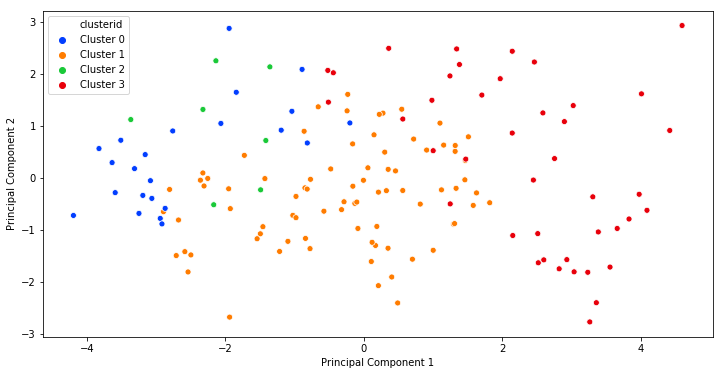

In [132]:
%matplotlib inline
fig = plt.figure(figsize = (12,6))
sns.scatterplot(data_pca_hr_cl1['PC1'], data_pca_hr_cl1['PC2'],hue= data_pca_hr_cl1['clusterid'].map({0:'Cluster 0',1:'Cluster 1',2:'Cluster 2',3:'Cluster 3'}),palette='bright',legend='full')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

### Repeating Hierarchical clustering with no. of clusters=5

In [133]:
clusterCut2 = pd.Series(cut_tree(mergings, n_clusters = 5).reshape(-1,))
data_hr2 = pd.concat([df, clusterCut2], axis=1)
data_hr2.columns =  ['country','child_mort','exports','health','imports','income','inflation','life_expec','total_fer','gdpp','clusterid']

**Number of countries in clusters.**

In [134]:
data_hr2.groupby('clusterid').clusterid.count()

clusterid
0    23
1    81
2     7
3    17
4    25
Name: clusterid, dtype: int64

In [135]:
# analysis of clusters formed
hr_clusters_child_mort2 = 	pd.DataFrame(data_hr2.groupby(["clusterid"]).child_mort.mean())
hr_clusters_exports2 = 	pd.DataFrame(data_hr2.groupby(["clusterid"]).exports.mean())
hr_clusters_health2 = 	pd.DataFrame(data_hr2.groupby(["clusterid"]).health.mean())
hr_clusters_imports2 = 	pd.DataFrame(data_hr2.groupby(["clusterid"]).imports.mean())
hr_clusters_income2 = 	pd.DataFrame(data_hr2.groupby(["clusterid"]).income.mean())
hr_clusters_inflation2 = 	pd.DataFrame(data_hr2.groupby(["clusterid"]).inflation.mean())
hr_clusters_life_expec2 = 	pd.DataFrame(data_hr2.groupby(["clusterid"]).life_expec.mean())
hr_clusters_total_fer2 = 	pd.DataFrame(data_hr2.groupby(["clusterid"]).total_fer.mean())
hr_clusters_gdpp2 = 	pd.DataFrame(data_hr2.groupby(["clusterid"]).gdpp.mean())

In [136]:
df_hr2 = pd.concat([pd.Series([0,1,2,3,4]), hr_clusters_child_mort2, hr_clusters_exports2, hr_clusters_health2,hr_clusters_imports2,hr_clusters_income2,hr_clusters_inflation2,hr_clusters_life_expec2,hr_clusters_total_fer2,hr_clusters_gdpp2], axis=1)
df_hr2.columns =  ['clusterid','child_mort','exports','health','imports','income','inflation','life_expec','total_fer','gdpp']

**Mean values of variables across clusters.**

In [137]:
df_hr2=round(df_hr2,2)
df_hr2

,clusterid,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,0,94.91,28.40,7.72,51.51,2384.91,7.34,56.84,5.20,1243.70
1,1,33.17,30.77,6.19,40.35,9351.60,7.21,70.93,2.77,5014.91
2,2,76.77,59.76,4.05,46.81,10814.29,23.76,63.74,4.67,5325.71
3,3,4.15,33.49,10.07,32.78,36858.82,1.39,81.03,1.80,40611.76
4,4,13.04,68.46,6.40,64.03,26546.40,5.53,75.57,2.01,17889.20


In [138]:
data_pca_hr_cl2= pd.concat([data_pca, clusterCut2], axis=1)
data_pca_hr_cl2.columns =  ['PC1','PC2','PC3','PC4','clusterid']
data_pca_hr_cl2.head()

,PC1,PC2,PC3,PC4,clusterid
0,-3.059753,-0.397117,1.322791,0.640158,0
1,0.562534,-0.245379,-0.030804,-1.377257,1
2,-0.321121,-0.613853,-1.814442,-0.241780,1
3,-3.363730,1.120443,-1.704350,2.086831,2
4,1.319563,0.621000,-0.062786,-0.704734,1


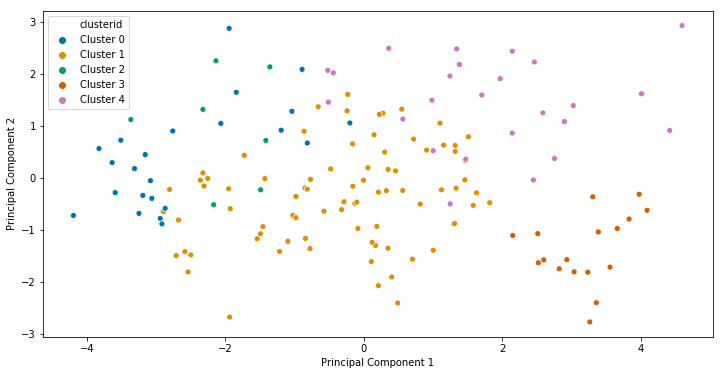

In [139]:
%matplotlib inline
fig = plt.figure(figsize = (12,6))
sns.scatterplot(data_pca_hr_cl2['PC1'], data_pca_hr_cl2['PC2'],hue= data_pca_hr_cl2['clusterid'].map({0:'Cluster 0',1:'Cluster 1',2:'Cluster 2',3:'Cluster 3',4:'Cluster 4'}),palette='colorblind',legend='full')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

In [140]:
# Comparison of hierarchical clustering for K=4 and K =5 doesn't show significant difference of Cluster formation on 
#Principal component plot (PC1-PC2)
#Choosing K=4 only

### Final list of Under-developed countries from k-means clustering

In [141]:
df_cl

,clusterid,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,0,92.29,28.48,6.07,41.74,3226.49,10.03,59.68,5.18,1555.92
1,1,7.23,70.18,6.45,61.42,33718.75,5.16,76.93,1.87,22560.62
2,2,29.52,27.74,5.50,29.13,10903.94,11.70,72.01,2.50,5237.45
3,3,22.30,43.90,7.08,58.75,9959.35,4.29,71.70,2.37,5359.48
4,4,4.68,35.59,10.05,34.98,36578.95,1.27,80.63,1.80,40457.89


In [142]:
len(data_km.loc[data_km['clusterid']==0])

39

### Finding the least developed countries from original dataset-K means

In [143]:
# During the initial data removal very high and very low developed values might have been removed due to extreme values of 
#variables. Now taking the mean values of the variables found by grouping on cluster IDs, finding the Least developed countries 
#from original dataset "data", which are having values lower than these mean values.

In [144]:
ud_countries=data[data['income']<=3226.49]
ud_countries=ud_countries[ud_countries['child_mort']>=92.29]
ud_countries=ud_countries[ud_countries['gdpp']<=1555.92]
ud_countries=ud_countries[ud_countries['life_expec']<=59.68]
ud_countries=ud_countries[ud_countries['health']<=6.07]

In [145]:
ud_countries.shape

(8, 10)

In [146]:
#Thus we could find out 15 such underdeveloped countries which are in funding need.

In [147]:
#As per Human development index is defined by life expectancy, income and education level. 
#Taking the first two indicators to sort the cluster of underdeveloped countries to sort the countries.

In [148]:
lowest_developed=ud_countries.sort_values(by=['income','life_expec'],ascending=[True,True])

In [149]:
lowest_developed

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
112,Niger,123.0,22.2,5.16,49.1,814,2.55,58.8,7.49,348
31,Central African Republic,149.0,11.8,3.98,26.5,888,2.01,47.5,5.21,446
106,Mozambique,101.0,31.5,5.21,46.2,918,7.64,54.5,5.56,419
63,Guinea,109.0,30.3,4.93,43.2,1190,16.10,58.0,5.34,648
97,Mali,137.0,22.8,4.98,35.1,1870,4.37,59.5,6.55,708
32,Chad,150.0,36.8,4.53,43.5,1930,6.39,56.5,6.59,897
28,Cameroon,108.0,22.2,5.13,27.0,2660,1.91,57.3,5.11,1310
40,Cote d'Ivoire,111.0,50.6,5.30,43.3,2690,5.39,56.3,5.27,1220


In [150]:
#Above are the least developed 8 countries out of the final 15 found.These are in direst need of aid with maximum aid reqirement beginning 
#from top of above list.


### Finding the least developed countries from original dataset-Hierarchical clustering. for n=5

In [151]:
df_hr2

,clusterid,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,0,94.91,28.40,7.72,51.51,2384.91,7.34,56.84,5.20,1243.70
1,1,33.17,30.77,6.19,40.35,9351.60,7.21,70.93,2.77,5014.91
2,2,76.77,59.76,4.05,46.81,10814.29,23.76,63.74,4.67,5325.71
3,3,4.15,33.49,10.07,32.78,36858.82,1.39,81.03,1.80,40611.76
4,4,13.04,68.46,6.40,64.03,26546.40,5.53,75.57,2.01,17889.20


In [152]:
ud_countries_hc=data[data['income']<=2384.91]
ud_countries_hc=ud_countries_hc[ud_countries_hc['child_mort']>=94.91]
ud_countries_hc=ud_countries_hc[ud_countries_hc['gdpp']<=1243.70]
ud_countries_hc=ud_countries_hc[ud_countries_hc['life_expec']<=56.84]
ud_countries_hc=ud_countries_hc[ud_countries_hc['health']<=7.72]

In [153]:
ud_countries_hc.shape

(4, 10)

In [154]:
ud_countries_hc

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
31,Central African Republic,149.0,11.8,3.98,26.5,888,2.01,47.5,5.21,446
32,Chad,150.0,36.8,4.53,43.5,1930,6.39,56.5,6.59,897
66,Haiti,208.0,15.3,6.91,64.7,1500,5.45,32.1,3.33,662
106,Mozambique,101.0,31.5,5.21,46.2,918,7.64,54.5,5.56,419


In [155]:
# This results into just 4 underdeveloped countries.

In [156]:
data_hr2.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,clusterid
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,0
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,1
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,1
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,2
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,1


In [157]:
len(data_hr2.loc[data_hr2['clusterid']==0])

23

In [158]:
lowest_developed_hc2=data_hr2.loc[data_hr2['clusterid']==0]

In [159]:
lowest_developed_hc2=lowest_developed_hc2.sort_values(by=['income','life_expec','health'],ascending=[True,True,True])
lowest_developed_hc2

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,clusterid
36,"Congo, Dem. Rep.",116.0,41.10,7.91,49.6,609,20.80,57.5,6.54,334,0
85,Liberia,89.3,19.10,11.80,92.6,700,5.47,60.8,5.02,327,0
25,Burundi,93.6,8.92,11.60,39.2,764,12.30,57.7,6.26,231,0
107,Niger,123.0,22.20,5.16,49.1,814,2.55,58.8,7.49,348,0
30,Central African Republic,149.0,11.80,3.98,26.5,888,2.01,47.5,5.21,446,0
101,Mozambique,101.0,31.50,5.21,46.2,918,7.64,54.5,5.56,419,0
90,Malawi,90.5,22.80,6.59,34.9,1030,12.10,53.1,5.31,459,0
62,Guinea,109.0,30.30,4.93,43.2,1190,16.10,58.0,5.34,648,0
138,Togo,90.3,40.20,7.65,57.3,1210,1.18,58.7,4.87,488,0
63,Guinea-Bissau,114.0,14.90,8.50,35.2,1390,2.97,55.6,5.05,547,0


In [160]:
lowest_developed_hc2.head(8)

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,clusterid
36,"Congo, Dem. Rep.",116.0,41.10,7.91,49.6,609,20.80,57.5,6.54,334,0
85,Liberia,89.3,19.10,11.80,92.6,700,5.47,60.8,5.02,327,0
25,Burundi,93.6,8.92,11.60,39.2,764,12.30,57.7,6.26,231,0
107,Niger,123.0,22.20,5.16,49.1,814,2.55,58.8,7.49,348,0
30,Central African Republic,149.0,11.80,3.98,26.5,888,2.01,47.5,5.21,446,0
101,Mozambique,101.0,31.50,5.21,46.2,918,7.64,54.5,5.56,419,0
90,Malawi,90.5,22.80,6.59,34.9,1030,12.10,53.1,5.31,459,0
62,Guinea,109.0,30.30,4.93,43.2,1190,16.10,58.0,5.34,648,0


In [161]:
#Above list sumamrises all the countries from K means clustering results. So it is very subjective to select the top ones. 
#It depends on the variables selected to prioritize.
#I have done that by using definition of Human development index and sorting on Income and Life expectancy.

### Finding the least developed countries from original dataset-Hierarchical clustering. for n=4

In [162]:

df_hr1

,clusterid,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,0,94.91,28.40,7.72,51.51,2384.91,7.34,56.84,5.20,1243.70
1,1,33.17,30.77,6.19,40.35,9351.60,7.21,70.93,2.77,5014.91
2,2,76.77,59.76,4.05,46.81,10814.29,23.76,63.74,4.67,5325.71
3,3,9.44,54.31,7.88,51.38,30720.48,3.85,77.78,1.92,27086.43


In [163]:
ud_countries_hc1=data[data['income']<=2384.91]
ud_countries_hc1=ud_countries_hc1[ud_countries_hc1['child_mort']>=94.91]
ud_countries_hc1=ud_countries_hc1[ud_countries_hc1['gdpp']<=1243.70]
ud_countries_hc1=ud_countries_hc1[ud_countries_hc1['life_expec']<=56.84]
ud_countries_hc1=ud_countries_hc1[ud_countries_hc1['health']<=7.72]

In [164]:
ud_countries_hc1.shape

(4, 10)

In [165]:
ud_countries_hc

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
31,Central African Republic,149.0,11.8,3.98,26.5,888,2.01,47.5,5.21,446
32,Chad,150.0,36.8,4.53,43.5,1930,6.39,56.5,6.59,897
66,Haiti,208.0,15.3,6.91,64.7,1500,5.45,32.1,3.33,662
106,Mozambique,101.0,31.5,5.21,46.2,918,7.64,54.5,5.56,419


In [166]:
#This also results into just 4 countries.

In [167]:
#The results of K means and Heirarchical clustering are same except one country.
#Minimum requirement is to report atleast 5 countries, hence result of K means can be reported.

In [169]:
#Final list - Niger, CentralGuinea,Mali,Chad,Cameroon,Cote d'ivore